In [1]:
import os

import pandas as pd

from kbc_pul.experiments_utils.datasets.file_naming import get_edge_count_dir
from kbc_pul.experiments_utils.file_utils import print_file_exists
from kbc_pul.project_info import data_dir



%load_ext autoreload
%autoreload 2


# Yago3_10 data exploration

## Load cleaned yago3_10 triples

In [2]:

dataset_name: str = 'yago3_10'

cleaned_data_dir = os.path.join(data_dir, dataset_name, 'cleaned_csv')
train_tsv_filename = os.path.join(
    cleaned_data_dir,
    'train.csv'
)
print_file_exists(train_tsv_filename)

? file exists: /home/joschout/Documents/Repos/KBC-e-metrics/data/yago3_10/cleaned_csv/train.csv
-> True


In [3]:
delimiter = "\t"
header=["E1", "Rel", "E2"]
triples_df: pd.DataFrame = pd.read_csv(train_tsv_filename, header=None, names=header, sep=delimiter)
triples_df.head()


,E1,Rel,E2
0,'e50_Cent',actedin,'eGet_Rich_or_Die_Tryin_(film)'
1,'e50_Cent',actedin,'eRighteous_Kill'
2,'eA._K._Hangal',actedin,'eAap_Ki_Kasam'
3,'eA._K._Hangal',actedin,'eAbhimaan_(1973_film)'
4,'eA._K._Hangal',actedin,'eAmar_Deep_(1979_film)'


## Find all relations


In [4]:
relations = triples_df["Rel"].unique()
relations

array(['actedin', 'created', 'dealswith', 'diedin', 'directed', 'edited',
       'exports', 'graduatedfrom', 'happenedin', 'hasacademicadvisor',
       'hascapital', 'haschild', 'hascurrency', 'hasgender',
       'hasmusicalrole', 'hasneighbor', 'hasofficiallanguage',
       'haswebsite', 'haswonprize', 'imports', 'influences',
       'isaffiliatedto', 'iscitizenof', 'isconnectedto', 'isinterestedin',
       'isknownfor', 'isleaderof', 'islocatedin', 'ismarriedto',
       'ispoliticianof', 'livesin', 'owns', 'participatedin', 'playsfor',
       'wasbornin', 'worksat', 'wrotemusicfor'], dtype=object)

In [5]:
for rel in sorted(relations):
    print(rel)

actedin
created
dealswith
diedin
directed
edited
exports
graduatedfrom
happenedin
hasacademicadvisor
hascapital
haschild
hascurrency
hasgender
hasmusicalrole
hasneighbor
hasofficiallanguage
haswebsite
haswonprize
imports
influences
isaffiliatedto
iscitizenof
isconnectedto
isinterestedin
isknownfor
isleaderof
islocatedin
ismarriedto
ispoliticianof
livesin
owns
participatedin
playsfor
wasbornin
worksat
wrotemusicfor


#### Output relations to file

In [6]:
relations_filename: str = os.path.join(
    cleaned_data_dir,
    'relations.txt'
)
with open(relations_filename, 'w') as relations_file:
    relations_file.write("\n".join(list(sorted(relations))))


## Statistics per relation

### Nb of literals per relation

In [7]:
df_n_lits_per_rel: pd.DataFrame = triples_df.groupby(
    by=['Rel'], as_index=False)["E1"].count()

df_n_lits_per_rel = df_n_lits_per_rel.rename(columns={"E1": "n_lits"})
df_n_lits_per_rel.head()

,Rel,n_lits
0,actedin,32153
1,created,6933
2,dealswith,1302
3,diedin,9244
4,directed,5481


In [8]:
df_n_lits_per_rel[df_n_lits_per_rel["Rel"] == 'isaffiliatedto']

,Rel,n_lits
21,isaffiliatedto,373721


### Nb of unique subject & object entities per relations

In [9]:
# df_n_unique_entities_per_rel = triples_df.groupby(
#     by=['Rel']).nunique()[["E1", "E2"]].reset_index()
#
# df_n_unique_entities_per_rel = df_n_unique_entities_per_rel.rename(
#     columns={"E1": "n_distinct_s_ent",
#              "E2": "n_distinct_o_ent"})
# df_n_unique_entities_per_rel.head()

## Pair statistics: # objects per (subject, relation)-pair

### Count # Objects per (subject, relation)

In [10]:
df_n_o_per_s_r_pair = triples_df.groupby(
    by=['Rel', 'E1']
).count().reset_index().rename(
    columns={"E2": "n_o_per_s_r_pair"})

df_n_o_per_s_r_pair.head()

,Rel,E1,n_o_per_s_r_pair
0,actedin,'e50_Cent',2
1,actedin,'eA._K._Hangal',8
2,actedin,'eAaliyah',2
3,actedin,'eAamir_Khan',12
4,actedin,'eAaron_Eckhart',9


### Statistics about #objects / (subject, relation) per relation

In [11]:
df_n_o_per_s_r_pair_statistics  = pd.DataFrame(
    group.describe().rename(
        columns={'n_o_per_s_r_pair':name}
    ).squeeze()
    for name, group
    in df_n_o_per_s_r_pair.groupby('Rel')
)

df_n_o_per_s_r_pair_statistics

,count,mean,std,min,25%,50%,75%,max
actedin,5402.0,5.952055,6.151133,1.0,2.0,4.0,8.00,140.0
created,2850.0,2.432632,2.963897,1.0,1.0,1.0,3.00,48.0
dealswith,220.0,5.918182,3.691609,1.0,1.0,7.0,9.00,14.0
diedin,9243.0,1.000108,0.010401,1.0,1.0,1.0,1.00,2.0
directed,1558.0,3.517972,3.849864,1.0,1.0,2.0,4.00,63.0
edited,357.0,8.635854,6.178674,1.0,4.0,8.0,12.00,45.0
exports,142.0,2.661972,1.453230,1.0,2.0,2.0,3.75,7.0
graduatedfrom,4715.0,1.557582,0.775789,1.0,1.0,1.0,2.00,10.0
happenedin,871.0,5.800230,3.946370,1.0,4.0,5.0,7.00,37.0
hasacademicadvisor,799.0,1.140175,0.378462,1.0,1.0,1.0,1.00,4.0


In [12]:
df_n_o_per_s_r_pair_statistics = df_n_o_per_s_r_pair_statistics[
    ['count', 'mean', 'std', 'min', '50%', 'max']
].rename(
    columns={
        'count': 'n_s_r_pairs',
        'mean': 'mean_n_o_per_s_r_pair',
        'std': 'std_n_o_per_s_r_pair',
        'min': 'min_n_o_per_s_r_pair',
        '50%': 'median_n_o_per_s_r_pair',
        'max': 'max_n_o_per_s_r_pair',
    }
)

In [13]:
df_n_o_per_s_r_pair_statistics

,n_s_r_pairs,mean_n_o_per_s_r_pair,std_n_o_per_s_r_pair,min_n_o_per_s_r_pair,median_n_o_per_s_r_pair,max_n_o_per_s_r_pair
actedin,5402.0,5.952055,6.151133,1.0,4.0,140.0
created,2850.0,2.432632,2.963897,1.0,1.0,48.0
dealswith,220.0,5.918182,3.691609,1.0,7.0,14.0
diedin,9243.0,1.000108,0.010401,1.0,1.0,2.0
directed,1558.0,3.517972,3.849864,1.0,2.0,63.0
edited,357.0,8.635854,6.178674,1.0,8.0,45.0
exports,142.0,2.661972,1.453230,1.0,2.0,7.0
graduatedfrom,4715.0,1.557582,0.775789,1.0,1.0,10.0
happenedin,871.0,5.800230,3.946370,1.0,5.0,37.0
hasacademicadvisor,799.0,1.140175,0.378462,1.0,1.0,4.0


## Pair statistics: # subject per (relation, object)-pair

### Count # subject per (relation, object)-pair

In [14]:
df_n_s_per_r_o_pair = triples_df.groupby(
    by=['Rel', 'E2']).count().reset_index().rename(columns={"E1": "n_s_per_r_o_pair"})
df_n_s_per_r_o_pair.head()

,Rel,E2,n_s_per_r_o_pair
0,actedin,'e!Three_Amigos!',3
1,actedin,'e$_(film)',5
2,actedin,"'e10,000_BC_(film)'",1
3,actedin,'e10.5_(miniseries)',5
4,actedin,'e101_Reykjavik',1


In [15]:
triples_df[(triples_df["Rel"] == 'actedin') & (triples_df["E2"] == "'e!Three_Amigos!'")]

,E1,Rel,E2
4927,'eChevy_Chase',actedin,'e!Three_Amigos!'
20244,'eMartin_Short',actedin,'e!Three_Amigos!'
28950,'eSteve_Martin',actedin,'e!Three_Amigos!'


### Statistics about #subject / (relation, object) per relation

In [16]:
df_n_s_per_r_o_pair_statistics  = pd.DataFrame(
    group.describe().rename(
        columns={'n_s_per_r_o_pair':name}
    ).squeeze()
    for name, group
    in df_n_s_per_r_o_pair.groupby('Rel')
)

df_n_s_per_r_o_pair_statistics

,count,mean,std,min,25%,50%,75%,max
actedin,6754.0,4.760586,2.252789,1.0,3.00,5.0,6.00,21.0
created,4425.0,1.566780,1.110784,1.0,1.00,1.0,2.00,16.0
dealswith,168.0,7.750000,17.021561,1.0,1.00,2.0,5.00,135.0
diedin,1889.0,4.893594,25.280561,1.0,1.00,1.0,3.00,751.0
directed,4983.0,1.099940,0.452530,1.0,1.00,1.0,1.00,9.0
edited,2799.0,1.101465,0.353267,1.0,1.00,1.0,1.00,6.0
exports,30.0,12.600000,8.401970,1.0,7.00,10.5,17.75,33.0
graduatedfrom,1056.0,6.954545,17.273705,1.0,1.00,2.5,6.00,303.0
happenedin,1366.0,3.698389,7.622011,1.0,1.00,1.0,3.00,140.0
hasacademicadvisor,510.0,1.786275,1.409833,1.0,1.00,1.0,2.00,10.0


In [17]:
df_n_s_per_r_o_pair_statistics = df_n_s_per_r_o_pair_statistics[
    ['count', 'mean', 'std', 'min', '50%', 'max']
].rename(
    columns={
        'count': 'n_r_o_pairs',
        'mean': 'mean_n_s_per_r_o_pair',
        'std': 'std_n_s_per_r_o_pair',
        'min': 'min_n_s_per_r_o_pair',
        '50%': 'median_n_s_per_r_o_pair',
        'max': 'max_n_s_per_r_o_pair',
    }
)

In [18]:
df_n_s_per_r_o_pair_statistics

,n_r_o_pairs,mean_n_s_per_r_o_pair,std_n_s_per_r_o_pair,min_n_s_per_r_o_pair,median_n_s_per_r_o_pair,max_n_s_per_r_o_pair
actedin,6754.0,4.760586,2.252789,1.0,5.0,21.0
created,4425.0,1.566780,1.110784,1.0,1.0,16.0
dealswith,168.0,7.750000,17.021561,1.0,2.0,135.0
diedin,1889.0,4.893594,25.280561,1.0,1.0,751.0
directed,4983.0,1.099940,0.452530,1.0,1.0,9.0
edited,2799.0,1.101465,0.353267,1.0,1.0,6.0
exports,30.0,12.600000,8.401970,1.0,10.5,33.0
graduatedfrom,1056.0,6.954545,17.273705,1.0,2.5,303.0
happenedin,1366.0,3.698389,7.622011,1.0,1.0,140.0
hasacademicadvisor,510.0,1.786275,1.409833,1.0,1.0,10.0


## Merge pair statistics

In [19]:
df_pair_statistics: pd.DataFrame = pd.concat(
    [
        df_n_o_per_s_r_pair_statistics,
        df_n_s_per_r_o_pair_statistics
     ], axis=1)
df_pair_statistics = df_pair_statistics.reset_index().rename(columns={"index":"Rel"})
df_pair_statistics.head()

,Rel,n_s_r_pairs,mean_n_o_per_s_r_pair,std_n_o_per_s_r_pair,min_n_o_per_s_r_pair,median_n_o_per_s_r_pair,max_n_o_per_s_r_pair,n_r_o_pairs,mean_n_s_per_r_o_pair,std_n_s_per_r_o_pair,min_n_s_per_r_o_pair,median_n_s_per_r_o_pair,max_n_s_per_r_o_pair
0,actedin,5402.0,5.952055,6.151133,1.0,4.0,140.0,6754.0,4.760586,2.252789,1.0,5.0,21.0
1,created,2850.0,2.432632,2.963897,1.0,1.0,48.0,4425.0,1.566780,1.110784,1.0,1.0,16.0
2,dealswith,220.0,5.918182,3.691609,1.0,7.0,14.0,168.0,7.750000,17.021561,1.0,2.0,135.0
3,diedin,9243.0,1.000108,0.010401,1.0,1.0,2.0,1889.0,4.893594,25.280561,1.0,1.0,751.0
4,directed,1558.0,3.517972,3.849864,1.0,2.0,63.0,4983.0,1.099940,0.452530,1.0,1.0,9.0


In [20]:
# len(df_pair_statistics)
#
# df_pair_statistics.reset_index()

### Merge relation stats in DataFrame

In [21]:
df_relation_stats: pd.DataFrame = df_n_lits_per_rel.merge(
    df_pair_statistics, on=["Rel"], )
df_relation_stats.head()

,Rel,n_lits,n_s_r_pairs,mean_n_o_per_s_r_pair,std_n_o_per_s_r_pair,min_n_o_per_s_r_pair,median_n_o_per_s_r_pair,max_n_o_per_s_r_pair,n_r_o_pairs,mean_n_s_per_r_o_pair,std_n_s_per_r_o_pair,min_n_s_per_r_o_pair,median_n_s_per_r_o_pair,max_n_s_per_r_o_pair
0,actedin,32153,5402.0,5.952055,6.151133,1.0,4.0,140.0,6754.0,4.760586,2.252789,1.0,5.0,21.0
1,created,6933,2850.0,2.432632,2.963897,1.0,1.0,48.0,4425.0,1.566780,1.110784,1.0,1.0,16.0
2,dealswith,1302,220.0,5.918182,3.691609,1.0,7.0,14.0,168.0,7.750000,17.021561,1.0,2.0,135.0
3,diedin,9244,9243.0,1.000108,0.010401,1.0,1.0,2.0,1889.0,4.893594,25.280561,1.0,1.0,751.0
4,directed,5481,1558.0,3.517972,3.849864,1.0,2.0,63.0,4983.0,1.099940,0.452530,1.0,1.0,9.0


In [22]:
len(df_relation_stats)


37

### Calculate the functionality (in both directions)

In [23]:
df_relation_stats['functionality_s_r_pairs'] = (
        df_relation_stats['n_s_r_pairs'] / df_relation_stats['n_lits']
)
df_relation_stats.head()

,Rel,n_lits,n_s_r_pairs,mean_n_o_per_s_r_pair,std_n_o_per_s_r_pair,min_n_o_per_s_r_pair,median_n_o_per_s_r_pair,max_n_o_per_s_r_pair,n_r_o_pairs,mean_n_s_per_r_o_pair,std_n_s_per_r_o_pair,min_n_s_per_r_o_pair,median_n_s_per_r_o_pair,max_n_s_per_r_o_pair,functionality_s_r_pairs
0,actedin,32153,5402.0,5.952055,6.151133,1.0,4.0,140.0,6754.0,4.760586,2.252789,1.0,5.0,21.0,0.168009
1,created,6933,2850.0,2.432632,2.963897,1.0,1.0,48.0,4425.0,1.566780,1.110784,1.0,1.0,16.0,0.411077
2,dealswith,1302,220.0,5.918182,3.691609,1.0,7.0,14.0,168.0,7.750000,17.021561,1.0,2.0,135.0,0.168971
3,diedin,9244,9243.0,1.000108,0.010401,1.0,1.0,2.0,1889.0,4.893594,25.280561,1.0,1.0,751.0,0.999892
4,directed,5481,1558.0,3.517972,3.849864,1.0,2.0,63.0,4983.0,1.099940,0.452530,1.0,1.0,9.0,0.284255


In [24]:
df_relation_stats['functionality_r_o_pairs'] = (
        df_relation_stats['n_r_o_pairs'] / df_relation_stats['n_lits']
)
df_relation_stats.head()

,Rel,n_lits,n_s_r_pairs,mean_n_o_per_s_r_pair,std_n_o_per_s_r_pair,min_n_o_per_s_r_pair,median_n_o_per_s_r_pair,max_n_o_per_s_r_pair,n_r_o_pairs,mean_n_s_per_r_o_pair,std_n_s_per_r_o_pair,min_n_s_per_r_o_pair,median_n_s_per_r_o_pair,max_n_s_per_r_o_pair,functionality_s_r_pairs,functionality_r_o_pairs
0,actedin,32153,5402.0,5.952055,6.151133,1.0,4.0,140.0,6754.0,4.760586,2.252789,1.0,5.0,21.0,0.168009,0.210058
1,created,6933,2850.0,2.432632,2.963897,1.0,1.0,48.0,4425.0,1.566780,1.110784,1.0,1.0,16.0,0.411077,0.638252
2,dealswith,1302,220.0,5.918182,3.691609,1.0,7.0,14.0,168.0,7.750000,17.021561,1.0,2.0,135.0,0.168971,0.129032
3,diedin,9244,9243.0,1.000108,0.010401,1.0,1.0,2.0,1889.0,4.893594,25.280561,1.0,1.0,751.0,0.999892,0.204349
4,directed,5481,1558.0,3.517972,3.849864,1.0,2.0,63.0,4983.0,1.099940,0.452530,1.0,1.0,9.0,0.284255,0.909141


## Reorder columns

In [25]:
reordered_columns = [
    "Rel",
    'functionality_s_r_pairs',
    'functionality_r_o_pairs',
    'n_lits',
    'n_s_r_pairs',
    'n_r_o_pairs'
]
for stat_indicator in ['mean', 'std', 'min', 'max', 'median']:
    for direction_indicator in ['o_per_s_r', 's_per_r_o']:
        reordered_columns.append(
            f'{stat_indicator}_n_{direction_indicator}_pair'
        )
df_relation_stats = df_relation_stats[reordered_columns]
df_relation_stats.head()


,Rel,functionality_s_r_pairs,functionality_r_o_pairs,n_lits,n_s_r_pairs,n_r_o_pairs,mean_n_o_per_s_r_pair,mean_n_s_per_r_o_pair,std_n_o_per_s_r_pair,std_n_s_per_r_o_pair,min_n_o_per_s_r_pair,min_n_s_per_r_o_pair,max_n_o_per_s_r_pair,max_n_s_per_r_o_pair,median_n_o_per_s_r_pair,median_n_s_per_r_o_pair
0,actedin,0.168009,0.210058,32153,5402.0,6754.0,5.952055,4.760586,6.151133,2.252789,1.0,1.0,140.0,21.0,4.0,5.0
1,created,0.411077,0.638252,6933,2850.0,4425.0,2.432632,1.566780,2.963897,1.110784,1.0,1.0,48.0,16.0,1.0,1.0
2,dealswith,0.168971,0.129032,1302,220.0,168.0,5.918182,7.750000,3.691609,17.021561,1.0,1.0,14.0,135.0,7.0,2.0
3,diedin,0.999892,0.204349,9244,9243.0,1889.0,1.000108,4.893594,0.010401,25.280561,1.0,1.0,2.0,751.0,1.0,1.0
4,directed,0.284255,0.909141,5481,1558.0,4983.0,3.517972,1.099940,3.849864,0.452530,1.0,1.0,63.0,9.0,2.0,1.0


## Write to file

In [26]:
data_statistics_dir = os.path.join(data_dir, dataset_name, 'data_stats')
if not os.path.exists(data_statistics_dir):
    os.makedirs(data_statistics_dir)

relation_statistics_filename: str = os.path.join(
    data_statistics_dir,
    f'{dataset_name}_relation_functionality_statistics.csv'
)
print_file_exists(relation_statistics_filename)
df_relation_stats.to_csv(relation_statistics_filename, index=False)



? file exists: /home/joschout/Documents/Repos/KBC-e-metrics/data/yago3_10/data_stats/yago3_10_relation_functionality_statistics.csv
-> True


## Getting counts of outgoing edges per (subject, relation)

In [27]:
n_edges_per_subject_rel_df = triples_df.groupby(by=['E1', 'Rel'], as_index=False).count()
# nb_tuples_per_rel_df = nb_tuples_per_rel_df.rename(columns={"E1": "n_lits"})
# nb_tuples_per_rel_df.head()

In [28]:
n_edges_per_object_rel_df = triples_df.groupby(by=['E2', 'Rel'], as_index=False).count()

In [29]:
# count_dir = os.path.join(data_dir, dataset_name, 'observed_edge_counts')
dataset_dir = os.path.join(cleaned_data_dir, dataset_name)
edge_count_dir: str = get_edge_count_dir(dataset_dir)

if not os.path.exists(edge_count_dir):
    os.makedirs(edge_count_dir)

print(edge_count_dir)

/home/joschout/Documents/Repos/KBC-e-metrics/data/yago3_10/cleaned_csv/yago3_10/observed_edge_counts


In [30]:
from kbc_pul.experiments_utils.datasets.binary_literal_entity_enum import BinaryLiteralEntity
from kbc_pul.experiments_utils.datasets.file_naming import get_edge_count_csv_filename_for

# relations_to_write_edge_counts_for = relations
relations_to_write_edge_counts_for = ['haschild']


for rel_name in relations_to_write_edge_counts_for:


    relation_edge_count_dir = os.path.join(edge_count_dir, rel_name)
    if not os.path.exists(relation_edge_count_dir):
        os.makedirs(relation_edge_count_dir)


    # for source entities
    observed_n_edges_per_source_for_rel_filename = get_edge_count_csv_filename_for(
        relation_edge_count_dir, predicate_name=rel_name, entity_position=BinaryLiteralEntity.SUBJECT
    )

    df_n_edges_per_subject_for_given_relation = n_edges_per_subject_rel_df[n_edges_per_subject_rel_df["Rel"] == rel_name]
    df_n_edges_per_subject_for_given_relation = df_n_edges_per_subject_for_given_relation[['E1', 'E2']].rename(
        columns={"E1": "Entity", "E2": 'n_observed_edges'})
    # df_n_outgoing_edges_for_given_relation.head()
    df_n_edges_per_subject_for_given_relation.to_csv(observed_n_edges_per_source_for_rel_filename, index=False)

    # for target entities
    observed_n_edges_per_target_for_rel_filename =  get_edge_count_csv_filename_for(
            relation_edge_count_dir,
        predicate_name=rel_name, entity_position=BinaryLiteralEntity.OBJECT
    )

    df_n_edges_per_object_for_given_relation = n_edges_per_object_rel_df[n_edges_per_object_rel_df["Rel"] == rel_name]
    df_n_edges_per_object_for_given_relation = df_n_edges_per_object_for_given_relation[['E1', 'E2']].rename(
        columns={"E1": "Entity", "E2": 'n_observed_edges'})
    # df_n_outgoing_edges_for_given_relation.head()
    df_n_edges_per_object_for_given_relation.to_csv(observed_n_edges_per_target_for_rel_filename, index=False)

## Plot frequency distributions

In [31]:
rel_name = 'haschild'

df_n_outgoing_edges_for_given_relation = n_edges_per_subject_rel_df[n_edges_per_subject_rel_df["Rel"] == rel_name]
df_n_outgoing_edges_for_given_relation = df_n_outgoing_edges_for_given_relation[['E1', 'E2']].rename(
    columns={"E1": "Entity", "E2": 'n_observed_edges'})
df_n_outgoing_edges_for_given_relation.head()

,Entity,n_observed_edges
236,'de_Marcel_Rudloff',1
255,'de_Michel_Giraud',1
298,'de_Pierre-Christian_Taittinger',1
632,'eA._Bhimsingh',1
712,'eA._P._J._Abdul_Kalam',1


In [32]:
df_n_outgoing_edges_for_given_relation.describe()

,n_observed_edges
count,2832.000000
mean,1.787782
std,1.215620
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,19.000000


array([[<AxesSubplot:title={'center':'n_observed_edges'}>]], dtype=object)

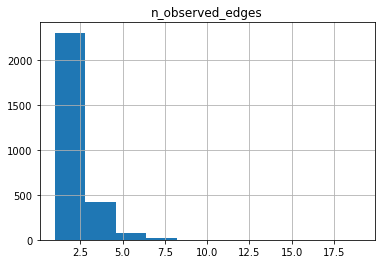

In [33]:
df_n_outgoing_edges_for_given_relation.hist()
